# Stock prediction of Apple.inc using artificial recurrent neural network called Long Short Term Memory (LSTM)
## [Video Tutorial for given code](https://www.youtube.com/watch?v=QIUxPv5PJOY&ab_channel=ComputerScienceComputerScience)
## [Concept of LSTM](https://www.youtube.com/watch?v=WCUNPb-5EYI&ab_channel=BrandonRohrer)
## [Course on Neural Networks](https://www.youtube.com/playlist?list=PLVZqlMpoM6kaJX_2lLKjEhWI0NlqHfqzp)
## [Another Good Tutorial](https://www.youtube.com/watch?v=arydWPLDnEc)

In [1]:
%config Completer.use_jedi = False

In [2]:
import math
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
import mplfinance as mpf
plt.style.use('fivethirtyeight')

In [3]:
df = yf.download("JEPI")
df.head()
len(df)

[*********************100%***********************]  1 of 1 completed


262

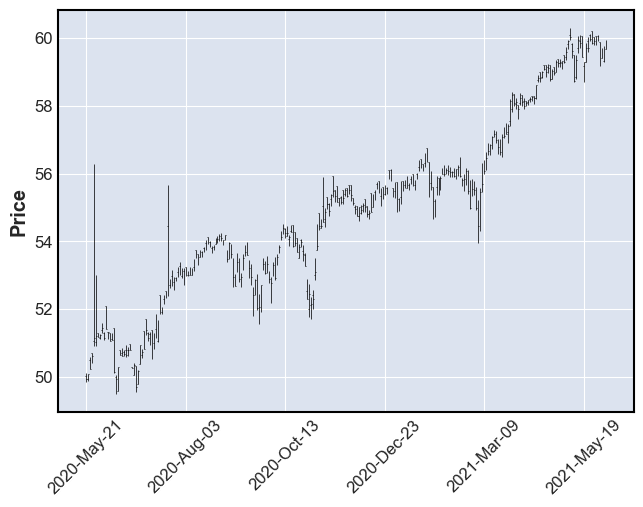

In [59]:
mpf.plot(df, style="yahoo")

Text(0, 0.5, 'Close Price USD ($)')

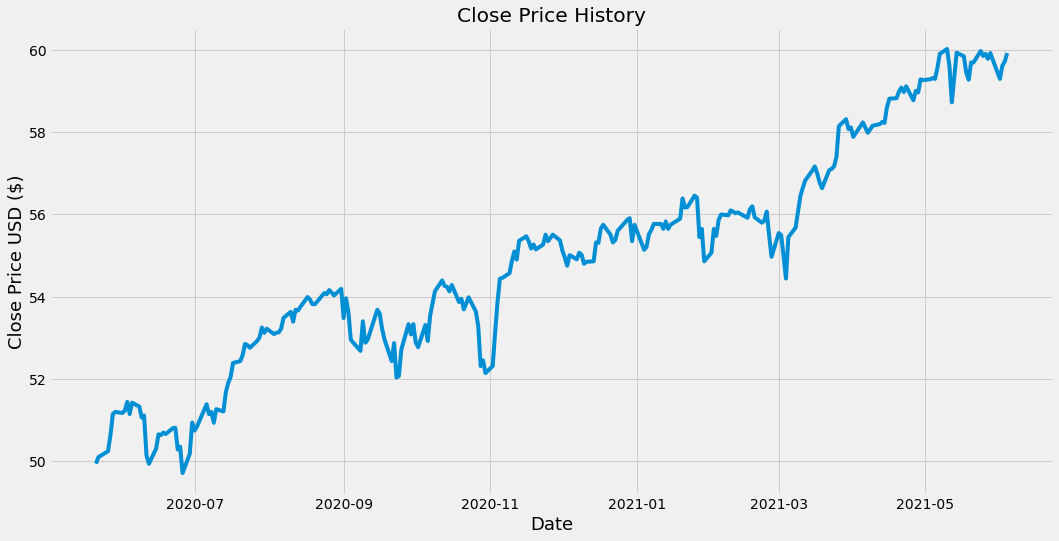

In [4]:
plt.figure(figsize=(16, 8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [5]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(len(dataset)*0.8)
training_data_len

209

In [35]:
# Scaling the Data
scalar = MinMaxScaler(feature_range=(0, 1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.02227599],
       [0.03767555],
       [0.05162201],
       [0.08929756],
       [0.13898286],
       [0.14421296],
       [0.14169471],
       [0.14740918],
       [0.16794168],
       [0.13917645],
       [0.16600459],
       [0.15709427],
       [0.1308473 ],
       [0.13559304],
       [0.04145256],
       [0.02179163],
       [0.05762688],
       [0.09133145],
       [0.08968513],
       [0.0955932 ],
       [0.09200942],
       [0.10614985],
       [0.10682781],
       [0.05559299],
       [0.06227583],
       [0.        ],
       [0.04542354],
       [0.11922512],
       [0.10024215],
       [0.10963683],
       [0.16222758],
       [0.13898286],
       [0.14401937],
       [0.11854716],
       [0.150799  ],
       [0.14527849],
       [0.19060524],
       [0.21249366],
       [0.22711846],
       [0.25966107],
       [0.26392245],
       [0.27815968],
       [0.30460025],
       [0.3015012 ],
       [0.29539953],
       [0.31137988],
       [0.31932184],
       [0.343

In [7]:
# Create the training dataset
# Creating the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0]) 

In [8]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Reshape the Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(149, 60, 1)

In [10]:
# Building the LTSM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
149/149 [==============================] - 8s 27ms/step - loss: 0.0146
Epoch 2/100
149/149 [==============================] - 4s 27ms/step - loss: 0.0050
Epoch 3/100
149/149 [==============================] - 4s 27ms/step - loss: 0.0046
Epoch 4/100
149/149 [==============================] - 4s 28ms/step - loss: 0.0040
Epoch 5/100
149/149 [==============================] - 4s 28ms/step - loss: 0.0041
Epoch 6/100
149/149 [==============================] - 4s 30ms/step - loss: 0.0034
Epoch 7/100
149/149 [==============================] - 4s 29ms/step - loss: 0.0031
Epoch 8/100
149/149 [==============================] - 4s 25ms/step - loss: 0.0028
Epoch 9/100
149/149 [==============================] - 4s 24ms/step - loss: 0.0028
Epoch 10/100
149/149 [==============================] - 4s 25ms/step - loss: 0.0024
Epoch 11/100
149/149 [==============================] - 4s 25ms/step - loss: 0.0021
Epoch 12/100
149/149 [==============================] - 4s 27ms/step - loss: 0.0019
E

In [39]:
# create testing dataset
# Create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
print(test_data)
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
print(x_test, y_test)

 0.6029056 , 0.59031469, 0.59515724, 0.61646487, 0.56029071,
       0.50992745, 0.56590801, 0.56125907, 0.51186454, 0.45859547,
       0.55641653, 0.57869252, 0.61549651, 0.65326885, 0.67263939,
       0.69007284, 0.7133172 , 0.72300228, 0.70653756, 0.68522993,
       0.67167066, 0.71428593, 0.71719138, 0.72300228, 0.74527864,
       0.81791789, 0.83438261, 0.81113825, 0.81501207, 0.79273608,
       0.82663461, 0.81501207, 0.80242153, 0.81016952, 0.81888625,
       0.82276043, 0.82760297, 0.82566588, 0.86246987, 0.88280877,
       0.8837775 , 0.89927386, 0.90895894, 0.89830513, 0.9118644 ,
       0.87893459, 0.90121058, 0.89733677, 0.92832948, 0.92639239]), array([0.60968523, 0.60774814, 0.61937032, 0.61646487, 0.61259068,
       0.61452778, 0.60193687, 0.62227614, 0.62905577, 0.6029056 ,
       0.59031469, 0.59515724, 0.61646487, 0.56029071, 0.50992745,
       0.56590801, 0.56125907, 0.51186454, 0.45859547, 0.55641653,
       0.57869252, 0.61549651, 0.65326885, 0.67263939, 0.69007284,

In [53]:
# Convert to numpy array
x_test = np.array(x_test)

In [54]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [56]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

In [57]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.3246778092294369

<ipython-input-58-c78e1e795b28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


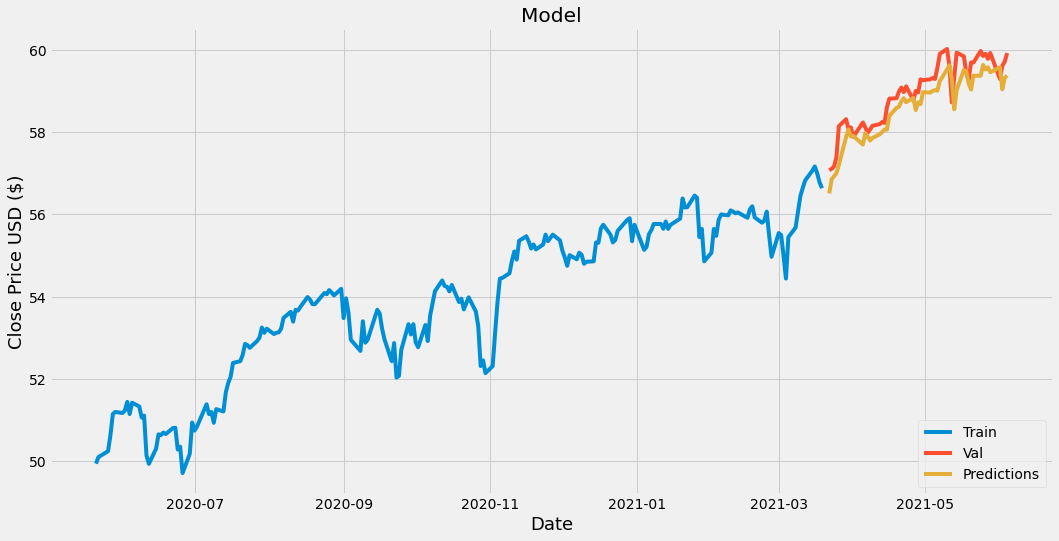

In [58]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the model
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [45]:
# Show the valid and predicted prices
valid

,Close
Date,
2021-03-22,57.080002
2021-03-23,57.110001
2021-03-24,57.169998
2021-03-25,57.400002
2021-03-26,58.150002
2021-03-29,58.320000
2021-03-30,58.080002
2021-03-31,58.119999
2021-04-01,57.889999


In [20]:
apple_quote = yf.download("JEPI")
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scalar.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[65.82775]]


In [78]:
yf.download("AAPL", start='2019-12-18', end='2019-12-18')['Close']

[*********************100%***********************]  1 of 1 completed


Date
2019-12-17    70.102501
Name: Close, dtype: float64